In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 - Dataset 

All the data saved in data folder. The format of file is "DateTime.csv". Each Row includes Kinect body tracking data 

<img src="Image/joints.png" style="width:500px;height:500;">

This section will use pandas to load data. 

In [2]:
df=pd.read_csv('Data/26_07_15_56_53.csv')
df.head()

,Pelvis,SpineNavel,SpineChest,Neck,ClavicleLeft,ShoulderLeft,ElbowLeft,WristLeft,HandLeft,HandTipLeft,...,HipRight,KneeRight,AnkleRight,FootRight,Head,Nose,EyeLeft,EarLeft,EyeRight,EarRight
0,0.108471 0.28940737 1.2758763,0.10532978 0.114558965 1.2327564,0.0964132 -0.026301267 1.2042474,0.08705284 -0.24139363 1.163144,0.11199 -0.21176802 1.1939524,0.21230051 -0.18476869 1.2941399,0.23287329 0.07369758 1.3971288,0.2894878 0.30090678 1.3979189,0.30668277 0.3934983 1.4220419,0.27719167 0.39879444 1.3171482,...,0.051518135 0.30482993 1.217488,0.049967553 0.7046853 1.2732967,-0.01684023 1.0576167 1.4260355,0.05077507 1.206381 1.3662214,0.09309785 -0.31982017 1.1383667,0.16230342 -0.36558226 0.9989596,0.1690915 -0.3996857 1.0435023,0.1707252 -0.38409472 1.1705247,0.12395069 -0.39649534 1.0163301,0.020012721 -0.38579127 1.0974425
1,0.1126227 0.2885084 1.2801337,0.10988665 0.11371352 1.23842,0.10131926 -0.027090743 1.211127,0.09189406 -0.24220468 1.1727722,0.11715044 -0.2122291 1.2028003,0.21695696 -0.18510424 1.3030074,0.23293193 0.07444711 1.4023846,0.28878745 0.30124587 1.3964646,0.30305222 0.3928899 1.4248857,0.2775459 0.4013349 1.3194008,...,0.055231325 0.30322057 1.2222489,0.05245776 0.7026259 1.274819,-0.015269678 1.0550057 1.4262627,0.050576456 1.2037165 1.3654459,0.09775219 -0.3207332 1.1488829,0.17056268 -0.37480885 1.014799,0.17552012 -0.4063771 1.0612558,0.17337105 -0.38379532 1.1869339,0.13139123 -0.4042341 1.0325819,0.025333714 -0.38796076 1.1094464
2,0.12641557 0.2786568 1.2712891,0.1186706 0.10428949 1.241722,0.11694547 -0.03253986 1.2056155,0.09909604 -0.24538897 1.1775964,0.13023993 -0.21516415 1.1995502,0.2465775 -0.18410033 1.2745243,0.22572112 0.07236815 1.369273,0.26908758 0.28901464 1.304858,0.28838444 0.3372149 1.3850691,0.27110153 0.42071688 1.3200725,...,0.049463414 0.28647587 1.2453346,0.033451363 0.6765386 1.316425,0.017913152 1.0223851 1.4817177,0.03401134 1.1622005 1.3845408,0.099181145 -0.32344368 1.155747,0.18408895 -0.37942946 1.032949,0.1866339 -0.40790322 1.0805659,0.17317724 -0.37964657 1.2024016,0.1456136 -0.40947196 1.048843,0.034572132 -0.39514396 1.1149226
3,0.12589161 0.26264706 1.2778023,0.1245911 0.09028137 1.2566378,0.12681574 -0.044706404 1.2242495,0.11340897 -0.2545335 1.2028981,0.14408806 -0.22359417 1.2223412,0.26114142 -0.19081767 1.290076,0.22813016 0.06542103 1.3649935,0.26137853 0.27254403 1.2815174,0.26341608 0.34464884 1.3413743,0.24577409 0.40441296 1.2566364,...,0.047525913 0.26521176 1.2617306,0.02474345 0.6442841 1.3473018,0.017564371 0.9837897 1.5095437,0.014416948 1.1206936 1.4125997,0.11451113 -0.33162683 1.1834495,0.19685516 -0.38477153 1.0615393,0.19881658 -0.41400322 1.1074768,0.1860596 -0.38930085 1.2277076,0.15857032 -0.41396192 1.0763243,0.049876958 -0.39968398 1.1415029
4,0.12873398 0.2569512 1.2838813,0.12940054 0.08565445 1.263963,0.13321546 -0.048702598 1.2332875,0.12037356 -0.25729132 1.2141249,0.15053158 -0.22633502 1.2335414,0.26701835 -0.19679047 1.3017485,0.2336231 0.06436469 1.3468726,0.25944084 0.27455923 1.2732801,0.24787706 0.34183347 1.3365594,0.24660577 0.42976218 1.2801998,...,0.051107533 0.2586233 1.2669038,0.022151306 0.6366299 1.3424064,0.011346031 0.96545786 1.5196685,0.009025029 1.1053759 1.4292448,0.12180741 -0.3340472 1.19565,0.1986717 -0.38851097 1.072151,0.20207888 -0.41715378 1.117925,0.19399449 -0.39148533 1.2374749,0.16100436 -0.41707087 1.088479,0.05563269 -0.40148705 1.1569909


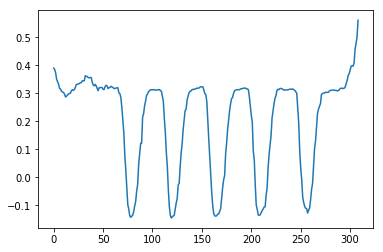

In [6]:
#Let Wrist right as Example
sampleJointList = df["WristRight"].tolist()
sampleJointListY = []
for sampleJointData in sampleJointList:
    sampleJointDataDataXYZ = sampleJointData.split()
    sampleJointListY.append(float(sampleJointDataDataXYZ[1]));
plt.plot(sampleJointListY)
plt.show()

In [4]:
squatdf=pd.read_csv('Data/bodyweight_squat_side_view.csv')
squatdf.head()

,Pelvis,SpineNavel,SpineChest,Neck,ClavicleLeft,ShoulderLeft,ElbowLeft,WristLeft,HandLeft,HandTipLeft,...,HipRight,KneeRight,AnkleRight,FootRight,Head,Nose,EyeLeft,EarLeft,EyeRight,EarRight
0,-0.0031308765 -0.17032118 1.7348484,-0.005411175 -0.32933688 1.685395,-0.0063160914 -0.45640764 1.6456529,-0.0053102486 -0.65507054 1.6055623,-0.0014095168 -0.62867284 1.6427317,0.059522428 -0.623246 1.7613324,0.24444258 -0.45486808 1.824588,0.43241882 -0.376458 1.7511325,0.5216012 -0.36755267 1.7442404,0.6032908 -0.3262131 1.7019012,...,-0.020506073 -0.14789183 1.6635288,-0.0028494075 0.21785955 1.7361813,-0.09073773 0.56246793 1.7976695,0.003999181 0.67883563 1.8557457,0.0074188514 -0.72834843 1.5887322,0.14977948 -0.76534605 1.5593017,0.12302051 -0.7970221 1.5910935,0.031774066 -0.7840905 1.6653358,0.11638632 -0.7960632 1.5427485,-0.0025730876 -0.7925029 1.5145416
1,-0.0031293435 -0.17032196 1.7348487,-0.005409676 -0.32933795 1.6853952,-0.0063146385 -0.45640895 1.6456531,-0.0053090462 -0.6550722 1.6055624,-0.0014081984 -0.62867445 1.6427318,0.05952836 -0.62325 1.7613306,0.2444664 -0.45488727 1.8245761,0.43244374 -0.3764902 1.7511084,0.5216265 -0.36759162 1.74421,0.6033163 -0.32625747 1.7018656,...,-0.020504646 -0.1478926 1.663529,-0.0028481875 0.21785942 1.736182,-0.090736955 0.5624683 1.7976708,0.003999032 0.67883474 1.8557519,0.007419982 -0.7283502 1.5887325,0.1497797 -0.7653528 1.5593023,0.12301932 -0.79702824 1.5910935,0.031772703 -0.7840942 1.6653355,0.11638545 -0.7960686 1.5427486,-0.0025738624 -0.7925036 1.5145409
2,0.008185484 -0.17303415 1.7392181,0.0045106565 -0.3319001 1.6884717,0.002209906 -0.45883286 1.6476343,-0.005653842 -0.65778345 1.6080651,0.0014278074 -0.63144946 1.6448997,0.061307672 -0.6297127 1.7643888,0.25249064 -0.46673533 1.8248196,0.44245362 -0.39231372 1.7512875,0.52949744 -0.37229937 1.7399119,0.6082232 -0.32269856 1.7005434,...,-0.02250705 -0.15094255 1.6722811,-0.0025843885 0.21749775 1.7328833,-0.09050615 0.561249 1.8020848,0.0067847967 0.67812324 1.8554564,0.00366429 -0.73156524 1.5906503,0.14529754 -0.7707027 1.559297,0.117548235 -0.803486 1.589201,0.026300982 -0.79239655 1.6640449,0.111085 -0.7995378 1.5409044,-0.00783819 -0.79110914 1.5127164
3,0.008072375 -0.1699148 1.7396795,0.009544337 -0.3300657 1.6909105,0.007986469 -0.4584881 1.6532385,-0.0042451327 -0.6569018 1.6086272,0.0037408806 -0.63155675 1.6461707,0.06329794 -0.63772994 1.7662152,0.25731587 -0.48053962 1.8361927,0.44552153 -0.40598014 1.7562423,0.52864873 -0.37652585 1.736552,0.6072365 -0.32137015 1.7039374,...,-0.026551243 -0.15011898 1.6736277,-0.004031541 0.21937004 1.7352921,-0.088567466 0.5644138 1.8089821,0.007558465 0.6791135 1.8703481,0.003467936 -0.7306555 1.5892092,0.1447056 -0.7739682 1.55897,0.115491256 -0.80632395 1.5882703,0.023395352 -0.7932002 1.6624233,0.10971915 -0.8016216 1.5397747,-0.008964211 -0.7891516 1.5101784
4,0.007978519 -0.16980195 1.7399491,0.009401817 -0.3299148 1.6912379,0.00775099 -0.4583122 1.6536374,-0.0046859113 -0.65667796 1.6091684,0.003254477 -0.63132405 1.6466975,0.062471785 -0.6374063 1.7668666,0.25679162 -0.48087552 1.8371761,0.44531542 -0.4070649 1.7574706,0.52849096 -0.37781954 1.737806,0.6070479 -0.32276043 1.7050551,...,-0.026600072 -0.1500152 1.6739,-0.0042173956 0.21947035 1.7348995,-0.08868724 0.5644649 1.8083229,0.007793486 0.6792503 1.8688293,0.0029530786 -0.7304351 1.5898311,0.14381033 -0.7749738 1.5598404,0.114307016 -0.8070117 1.5891703,0.02227781 -0.7929661 1.6631758,0.10862547 -0.8023671 1.5406743,-0.009881623 -0.7889766 1.5109382
